In [1]:
import numpy as np
import h5py
data_path = './data/train/digitStruct.mat'
mat_f = h5py.File(data_path,'r')
num_img = mat_f['/digitStruct/name'].size
print(num_img)
#data = f.get('data/variable1')
#data = np.array(data) # For converting to a NumPy array

33402


In [33]:
names_obj=mat_f['digitStruct/name']
names = []
for i in range(names_obj.shape[0]):
    names.append(''.join([chr(v[0]) for v in mat_f[names_obj[i][0]]]))
    #print(name)
   

In [36]:
len(names)

33402

In [3]:
mat_f['digitStruct'].keys()

<KeysViewHDF5 ['bbox', 'name']>

In [37]:
box_obj = mat_f['digitStruct/bbox']
bboxes = []
#for i in range(box_obj.shape[0]):


In [69]:
box_obj.size

33402

In [56]:
def bboxHelper(attr):
    if len(attr) > 1:
        attr = [mat_f[attr[j].item()][0][0] for j in range(len(attr))]
    else:
        attr = [attr[0][0]]
    return attr

def getBbox(n):
    bbox = {}
    bb = box_obj[n].item()
    # bbox = bboxHelper(f[bb]["label"])
    bbox['height'] = bboxHelper(mat_f[bb]["height"])
    bbox['label'] = bboxHelper(mat_f[bb]["label"])
    bbox['left'] = bboxHelper(mat_f[bb]["left"])
    bbox['top'] = bboxHelper(mat_f[bb]["top"])
    bbox['width'] = bboxHelper(mat_f[bb]["width"])
    return bbox

In [57]:
getBbox(0)

{'height': [219.0, 219.0],
 'label': [1.0, 9.0],
 'left': [246.0, 323.0],
 'top': [77.0, 81.0],
 'width': [81.0, 96.0]}

In [67]:
from PIL import Image
from PIL import ImageDraw

im = Image.open('data/train/1.png')
draw = ImageDraw.Draw(im)
box = (246, 77, 81+246, 219+77)
draw.rectangle(box,outline=(255,0,0),width=2)

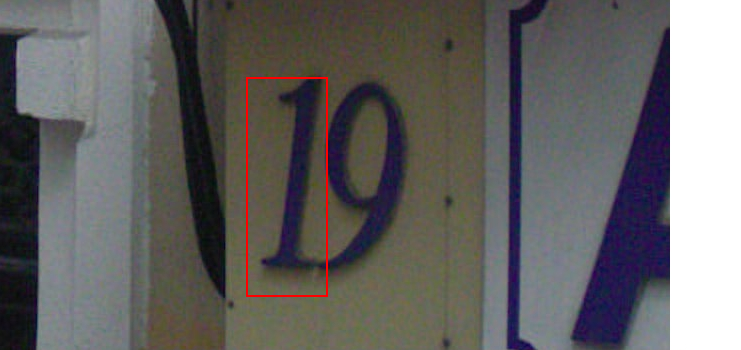

In [68]:
im

In [55]:
mat_f[mat_f[box_obj[0][0]]['height'][0][0]]

<HDF5 dataset "WQi": shape (1, 1), type "<f8">

In [71]:
import pickle
import os

path = os.path.expanduser('~/data/annotations/coco2017_instances.pkl')
f = open(path,'rb')
anno = pickle.load(f)

In [86]:
from PIL.ImageDraw import Draw
def draw_plain_boxes(image,boxes, color=(255, 0, 0)):
    draw = Draw(image)
    for box in boxes:
        box = list(np.array(box, dtype=int))
        draw.rectangle(box, outline=color, width=3)
    return image

In [75]:
from convert_lable import get_names, get_objs
data_path = './data/test/digitStruct.mat'
im_folder = './data/test'
mat_f = h5py.File(data_path,'r')
#names = get_names(mat_f)

In [76]:
names = get_names(mat_f)

In [83]:
objs  = get_objs(mat_f)

In [84]:
names[1]

'2.png'

In [85]:
objs[1]

[{'bbox': [99.0, 5.0, 14.0, 23.0], 'category_id': 2.0},
 {'bbox': [114.0, 8.0, 8.0, 23.0], 'category_id': 1.0},
 {'bbox': [121.0, 6.0, 12.0, 23.0], 'category_id': 10.0}]

In [92]:
boxes = np.array([o['bbox'] for o in objs[1]])
boxes[:,2] += boxes[:,0]
boxes[:,3] += boxes[:,1]

In [101]:
from convert_lable import get_im_info
i=0
for name,obj in zip(names,objs):
    im = {}
    im['file_name'] = name
    im['id'] = '{}{:07d}.png'.format(1, int(name[:-4]))
    w,h=get_im_info(os.path.join(im_folder, name))
    im['height'] = h
    im['width'] = w
    im['objects'] = obj
    print(im)
    if i>2:
        break
    i+=1

{'file_name': '1.png', 'id': '10000001.png', 'height': 47, 'width': 99, 'objects': [{'bbox': [43.0, 7.0, 19.0, 30.0], 'category_id': 5.0}]}
{'file_name': '2.png', 'id': '10000002.png', 'height': 48, 'width': 182, 'objects': [{'bbox': [99.0, 5.0, 14.0, 23.0], 'category_id': 2.0}, {'bbox': [114.0, 8.0, 8.0, 23.0], 'category_id': 1.0}, {'bbox': [121.0, 6.0, 12.0, 23.0], 'category_id': 10.0}]}
{'file_name': '3.png', 'id': '10000003.png', 'height': 31, 'width': 101, 'objects': [{'bbox': [61.0, 6.0, 11.0, 16.0], 'category_id': 6.0}]}
{'file_name': '4.png', 'id': '10000004.png', 'height': 31, 'width': 75, 'objects': [{'bbox': [32.0, 6.0, 14.0, 17.0], 'category_id': 1.0}]}


In [94]:
boxes

array([[ 99.,   5., 113.,  28.],
       [114.,   8., 122.,  31.],
       [121.,   6., 133.,  29.]])

In [87]:
im = Image.open(os.path.join(im_folder, names[1]))

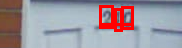

In [93]:
draw_plain_boxes(im, boxes)

In [73]:
anno['val2017'][0]

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133,
 'objects': [{'segmentation': [[224.24,
     297.18,
     228.29,
     297.18,
     234.91,
     298.29,
     243.0,
     297.55,
     249.25,
     296.45,
     252.19,
     294.98,
     256.61,
     292.4,
     254.4,
     264.08,
     251.83,
     262.61,
     241.53,
     260.04,
     235.27,
     259.67,
     230.49,
     259.67,
     233.44,
     255.25,
     237.48,
     250.47,
     237.85,
     243.85,
     237.11,
     240.54,
     234.17,
     242.01,
     228.65,
     249.37,
     224.24,
     255.62,
     220.93,
     262.61,
     218.36,
     267.39,
     217.62,
     268.5,
     218.72,
     295.71,
     225.34,
     297.55]],
   'area': 1481.3806499999994,
   'iscrowd': 0,
   'image_id': 